In [32]:
import matplotlib.pyplot as plt        # plotting
import numpy as np                     # linear algebra
import os                              # accessing directory structure
import pandas as pd                    # data processing, CSV file I/O (e.g. pd.read_csv)

In [33]:
# print(os.listdir('C:/Users/f4puslg/Desktop/Garv/ML/Term 4 - EDA/Project'))

In [34]:
def ReadMutualFund():
    # Read Mutual fund datatset
    df = pd.read_csv('C:/Users/goura/Documents/ThinkStats2-master/Project/Mutual Funds.csv')
    nRow, nCol = df.shape
    print(f'There are {nRow} rows and {nCol} columns, in Mutual Fund Dataset')
    
    return df

In [35]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['% Total Missing Values'] = 100 * mz_table['Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 50), "columns having greater than 50% missing value.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 40), "columns having greater than 40% missing value.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 30), "columns having greater than 30% missing value.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 20), "columns having greater than 20% missing value.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 10), "columns having greater than 10% missing value.")

        return mz_table

In [36]:
def CleanDf(df):
    # Create new dataset with selected columns
    df_clean = df.filter(['fund_name', 'fund_extended_name', 'fund_family', 'net_assets', 
                    'ytd_return', 'fund_yield', 'morningstar_rating', 'inception_date', 
                    'investment', 'size', 'net_annual_expense_ratio_fund', 'price_earnings', 
                    'price_book', 'median_market_cap', 'morningstar_return_rating', 'fund_return_1month', 
                    'fund_return_3months', 'fund_return_1year', 'fund_return_3years', 
                    'fund_return_5years', 'fund_return_10years', 'fund_return_2018', 'portfolio_cash', 
                    'portfolio_stocks', 'portfolio_bonds', 'portfolio_others', 'portfolio_preferred', 
                    'portfolio_convertable', 'basic_materials', 'consumer_cyclical', 'financial_services', 
                    'real_estate', 'consumer_defensive', 'healthcare', 'utilities', 'communication_services', 
                    'energy', 'industrials', 'technology', 'morningstar_risk_rating', 'fund_alpha_3years', 
                    'fund_beta_3years', 'fund_r_squared_3years', 'fund_standard_deviation_3years', 
                    'fund_sharpe_ratio_3years', 'fund_treynor_ratio_3years'], axis=1)
    
    # Divide net assets columns by 1 Million for easier understanding.
    df_clean['net_assets'] = df_clean['net_assets']/1000000
    
    # Convert objects to numeric
    df_clean["median_market_cap"] = pd.to_numeric(df_clean.median_market_cap, errors='coerce')
    df_clean["price_earnings"] = pd.to_numeric(df_clean.price_earnings, errors='coerce')
    
    
    return df_clean
    

In [37]:
def RemoveNull(df):
    df_non_null = df.dropna()
    nRow, nCol = df_non_null.shape
    print(f'There are {nRow} rows and {nCol} columns, after removing all rows with null values')
    
    return df_non_null

In [38]:
MF_raw = ReadMutualFund() #Read Mutual Fund Dataset

There are 25308 rows and 125 columns, in Mutual Fund Dataset


In [39]:
df_null = missing_zero_values_table(MF_raw)   #Check dataset for missing values

Your selected dataframe has 125 columns and 25308 Rows.
There are 116 columns that have missing values.
There are  2 columns having greater than 50% missing value.
There are  6 columns having greater than 40% missing value.
There are  17 columns having greater than 30% missing value.
There are  20 columns having greater than 20% missing value.
There are  31 columns having greater than 10% missing value.


###### We have huge number of missing values in dataset. Lets first figureout important variables we are going to use for analysis and then we will repeat the above step.

### Important Variables
**fund_name** : short form of fund name<br>
**fund_extended_name** : long form of fund name<br>
**category** : Differentiating factor for mutual funds according to their investment objectives and principal investment features<br>
**fund_family** : A family of mutual funds is a group of funds that are marketed under one or more brand names, usually having the same distributor, and investment advisor<br>
**net_assets** : It represents the total of all dollars invested in all share classes of the fund. Do not confuse it with Net Asset Value(NAV, per share/unit price of the fund)<br>
**ytd_return** : profit generated since the start of the year.<br>
**fund_yield** : Yield is the income returned on an investment, such as the interest received from holding a security. The yield is usually expressed as an annual percentage rate based on the investment's cost, current market value, or face value<br>
**morningstar_rating** : The Morningstar Rating is a measure of a fund's risk-adjusted return, relative to similar funds. Funds are rated from 1 to 5 stars, with the best performers receiving 5 stars and the worst performers receiving a single star<br>
**inception_date** : The date on which the fund began its operations<br>
**investment** : Classification of funds based on both the size of the companies invested in and the growth prospects of the invested stocks. *Value Funds*, style of investing that looks for high-quality, low-growth companies that are out of favor with the market. *Growth Funds*, which look to companies that have had (and are expected to have) strong growth in earnings, sales, and cash flows. *Blend Funds*, which simply refers to companies that are neither value nor growth stocks and are classified as being somewhere in the middle.<br>
**size** : Size of fund. Large, Medium, Small<br>
**net_annual_expense_ratio_fund** : The expense ratio is the annual fee that all funds charge their shareholders<br>
**price_earnings** : PE stands for price-to-earnings ratio, and tells you whether a stock, a stock index, or a mutual find consisting of stocks is selling at a reasonable price<br>
**price_book** : Companies use the price-to-book ratio to compare a firm's market to book value by dividing the price per share by book value per share (BVPS). The price-to-book ratio compares a company's market value to its book value<br>
**median_market_cap** : The average market capitalization of a fund's equity portfolio gives you a measure of the size of the companies in which the fund invests<br>
**morningstar_return_rating** : The Morningstar return rating is a ranking given to publicly traded mutual funds and exchange-traded funds (ETFs) by the investment research firm Morningstar<br> 
**fund_return_1month** : profit generated in past 1 month<br>
**fund_return_3months** : profit generated in past 3 month<br>
**fund_return_1year** : profit generated in past 1 year<br>
**fund_return_3years** : profit generated in past 3 year<br>
**fund_return_5years** : profit generated in past 5 year<br>
**fund_return_10years** : profit generated in past 10 year<br>
**fund_return_2018** : profit generated in year 2018<br>
#### Portfolio Composition 
**portfolio_cash** : % of fund's portfolio composition % in cash<br>
**portfolio_stocks** : % of fund's portfolio composition % in stocks<br>
**portfolio_bonds** : % of fund's portfolio composition % in bonds<br>
**portfolio_others** : % of fund's portfolio composition % in others<br>
**portfolio_preferred** : % of fund's portfolio composition % in preferred<br>
**portfolio_convertable** : % of fund's portfolio composition % in convertable<br>
#### Portfolio Diversity
**basic_materials** : % exposure of mutual fund in basic material sector<br>
**consumer_cyclical** : % exposure of mutual fund in consumer cyclical sector<br>
**financial_services** : % exposure of mutual fund in financial services sector<br>
**real_estate** : % exposure of mutual fund in real estate sector<br>
**consumer_defensive** : % exposure of mutual fund in consumer defensive sector<br>
**healthcare** : % exposure of mutual fund in healthcare sector<br>
**utilities** : % exposure of mutual fund in utilities sector<br>
**communication_services** :% exposure of mutual fund in communication services sector<br>
**energy** : % exposure of mutual fund in energy sector<br>
**industrials** : % exposure of mutual fund in industrials sector<br>
**technology** : % exposure of mutual fund in technology sector<br>
#### Risk Assesment Variables
**morningstar_risk_rating** : The Morningstar risk rating is a ranking given to publicly traded mutual funds and exchange-traded funds (ETFs) by the investment research firm Morningstar<br>
**fund_alpha_3years** : Alpha is a measure of an investment's performance on a risk-adjusted basis. It takes the volatility (price risk) of a security or fund portfolio and compares its risk-adjusted performance to a benchmark index. For investors, the higher the alpha the better<br>
**fund_beta_3years** : Beta, also known as the beta coefficient, is a measure of the volatility, or systematic risk, of a security or a portfolio compared to the market as a whole<br>
**fund_r_squared_3years** : R-squared is a statistical measure that represents the percentage of a fund portfolio or a security's movements that can be explained by movements in a benchmark index<br>
**fund_standard_deviation_3years** : Standard deviation measures the dispersion of data from its mean. Basically, the more spread out the data, the greater the difference is from the norm<br>
**fund_sharpe_ratio_3years** : the Sharpe ratio measures risk-adjusted performance. The greater an investment's Sharpe ratio, the better its risk-adjusted performance<br>
**fund_treynor_ratio_3years** : The Treynor ratio, also known as the reward-to-volatility ratio, is a performance metric for determining how much excess return was generated for each unit of risk taken on by a portfolio.

In [40]:
MF_C = CleanDf(MF_raw)   #Create new dataframe with new columns
MF_C.head()              #Display head of dataframe

,fund_name,fund_extended_name,fund_family,net_assets,ytd_return,fund_yield,morningstar_rating,inception_date,investment,size,...,energy,industrials,technology,morningstar_risk_rating,fund_alpha_3years,fund_beta_3years,fund_r_squared_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years,fund_treynor_ratio_3years
0,AAAAX,DWS RREEF Real Assets Fund - Class A,DWS,530.28,12.79,1.43,3,2007-07-29,Blend,Large,...,17.03,9.24,1.08,3.0,-1.72,1.15,68.23,8.57,0.70,5.05
1,AAADX,Aberdeen Income Builder Fund Class A,Aberdeen,88.84,9.21,2.62,2,2011-12-29,Blend,Large,...,1.20,11.53,29.99,1.0,-0.44,0.76,90.39,8.58,1.01,11.55
2,AAAGX,Thrivent Large Cap Growth Fund Class A,Thrivent Funds,1080.00,16.00,0.00,3,1999-10-28,Growth,Large,...,0.78,7.08,35.30,3.0,0.58,1.11,80.41,13.36,1.05,12.65
3,AAAIX,American Century Strategic Allocation: Aggress...,American Century Investments,785.27,11.57,1.38,4,2000-07-31,Growth,Large,...,5.36,11.25,21.30,3.0,-1.25,1.40,96.05,8.76,0.92,5.77
4,AAANX,Horizon Active Asset Allocation Fund Investor ...,Horizon Investments,527.13,11.62,0.66,4,2012-01-30,Blend,Large,...,5.56,10.53,18.61,5.0,-3.54,1.76,91.37,11.31,0.72,4.5


In [41]:
missing_zero_values_table(MF_C)   #Check dataset for missing values

Your selected dataframe has 46 columns and 25308 Rows.
There are 40 columns that have missing values.
There are  1 columns having greater than 50% missing value.
There are  1 columns having greater than 40% missing value.
There are  1 columns having greater than 30% missing value.
There are  1 columns having greater than 20% missing value.
There are  1 columns having greater than 10% missing value.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,% Total Missing Values,Data Type
median_market_cap,6080,18661,73.7,24741,97.8,73.7,float64
fund_treynor_ratio_3years,1,1669,6.6,1670,6.6,6.6,object
fund_sharpe_ratio_3years,50,1669,6.6,1719,6.8,6.6,float64
fund_standard_deviation_3years,0,1669,6.6,1669,6.6,6.6,float64
fund_r_squared_3years,12,1669,6.6,1681,6.6,6.6,float64
fund_beta_3years,33,1669,6.6,1702,6.7,6.6,float64
fund_alpha_3years,52,1669,6.6,1721,6.8,6.6,float64
investment,0,1502,5.9,1502,5.9,5.9,object
size,0,1502,5.9,1502,5.9,5.9,object
fund_return_2018,18,954,3.8,972,3.8,3.8,float64


###### We can see all the columns have less than 10% missing values. I feel pretty safe to remove all the rows with NaN.

In [42]:
MF_df = RemoveNull(MF_C)  #Remove all rows with NaN(Null Values)
MF_df.head()

There are 4908 rows and 46 columns, after removing all rows with null values


,fund_name,fund_extended_name,fund_family,net_assets,ytd_return,fund_yield,morningstar_rating,inception_date,investment,size,...,energy,industrials,technology,morningstar_risk_rating,fund_alpha_3years,fund_beta_3years,fund_r_squared_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years,fund_treynor_ratio_3years
17,AABOX,Cavanal Hill Bond Fund Class A,Cavanal Hill funds,106.15,2.40,2.19,2,2011-05-01,Blend,Medium,...,0.00,0.00,0.00,3.0,-0.88,0.94,96.88,2.85,-0.06,-0.21
51,AAHMX,Aberdeen Short Duration High Yield Municipal F...,Aberdeen,214.08,1.63,3.03,1,2013-05-30,Value,Small,...,0.00,0.00,0.00,1.0,0.50,0.44,73.08,1.75,0.65,2.62
54,AAIBX,Cavanal Hill Moderate Duration Fund Class A,Cavanal Hill funds,27.26,1.82,2.00,1,2011-05-01,Value,Medium,...,0.00,0.00,0.00,1.0,-0.32,0.58,86.21,1.87,0.07,0.19
57,AAINX,Thrivent Opportunity Income Plus Fund Class A,Thrivent Funds,580.91,3.89,4.01,3,1987-07-15,Value,Medium,...,24.62,0.66,0.60,2.0,2.51,0.36,22.29,2.23,1.22,7.77
69,AAMPX,AllianzGI Micro Cap Fund Class P,Allianz Funds,19.08,14.48,0.00,1,2010-12-26,Growth,Small,...,3.74,8.76,23.09,5.0,-4.91,1.24,54.10,18.04,0.55,7.1


In [44]:
# Mean of variables

print('mean of net_assets is : ', MF_df.net_assets.mean())
print('mean of ytd_return is : ', MF_df.ytd_return.mean())
print('mean of morningstar_rating is : ', MF_df.morningstar_rating.mean())
print('mean of morningstar_return_rating is : ', MF_df.morningstar_return_rating.mean())
print('mean of morningstar_risk_rating is : ', MF_df.morningstar_risk_rating.mean())
print('mean of net_annual_expense_ratio_fund is : ', MF_df.net_annual_expense_ratio_fund.mean())
print('mean of median_market_cap is : ', MF_df.median_market_cap.mean())
print('mean of price_earnings is : ', MF_df.price_earnings.mean())
print('mean of price_book is : ', MF_df.price_book.mean())

mean of net_assets is :  2748.3193899947137
mean of ytd_return is :  3.5154920130399416
mean of morningstar_rating is :  3.0755908720456397
mean of morningstar_return_rating is :  3.0755908720456397
mean of morningstar_risk_rating is :  3.100040749796251
mean of net_annual_expense_ratio_fund is :  0.9166320293398562
mean of median_market_cap is :  59.95885493072538
mean of price_earnings is :  1.6804319478402612
mean of price_book is :  0.4862387938060292


C:\Users\goura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


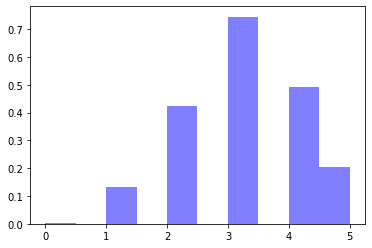

In [61]:
n, bins, patches = plt.hist(MF_df.morningstar_risk_rating, 10, normed=1, facecolor='blue', alpha=0.5)

C:\Users\goura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


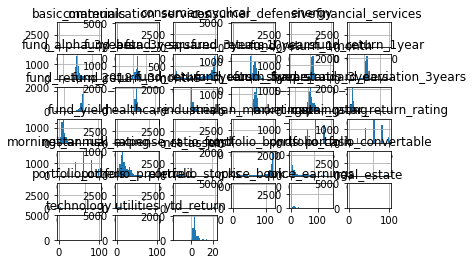

In [67]:
hist = MF_df.hist(bins=30)
plt.tight_layout()